
Control system dataset for causal discovery
===========================================

*K.Rathsman*, *S.W.Mogensen* and *P.Nilsson*

This dataset comprises control system data from the accelerator cryogenics plant (ACCP) at the European Spallation Source (ESS). If you use the data, please cite 

S.W.Mogensen, K.Rathsman, P.Nilsson, Causal discovery in a complex industrial system: A time series benchmark, in Proceedings of the 3rd Conference on Causal Learning and Reasoning (CLeaR), 2024, Available: https://doi.org/10.48550/arXiv.2310.18654
 
The paper also contains a detailed description of the data and of the underlying system. More description, code, and help to get started can be found at https://soerenwengel.github.io/essdata

The following is a brief description of the dataset as well as Python code to get started. The above paper contains a more detailed description. The dataset is intended as a causal discovery benchmark: A causal graph has been constructed based on knowledge of how the ACCP works, and this graph is found in the paper. Causal discovery methods should be able to recover this graph, and different methods can be compared using this benchmark. The exact interpretation of the causal graph is described in more detail in the above paper and its references, and a brief description of the causal graph is given in the Subsystems section below.

The data was recorded during three periods of steady state operation. During each period, the control room operators did not change any of the control settings, however, control settings are different between time periods. A total of 233 different process variables (PVs) are present in the dataset. They are all measurements of physical quantities in the ACCP, e.g., temperatures and pressures. Each observation contains a measured value, a PV index as well as some metadata.

# DataportalClient

In [1]:
import pandas as pd
from dataportal import DataportalClient;


token = # Enter your generated JWT

client = DataportalClient(token)


Connection OK


# Data files
The dataset consists of a large number of datafiles. To tabulate the files we use the DataPortal.listFiles() method and Pandas:

In [2]:
%%capture
dataset = 'ControlSystem'
files = pd.DataFrame.from_records(client.fromDataset('ControlSystem').listFiles(True), index = 'FileID')

‼️ Note: There is a limitation of 100 files in the DataportalClient.listFiles() method so the file list is not complete. To include all the files in the dataset, use the following workaround: (Note that this might take a few minutes):

In [4]:
records = []
file_id = files.index[-1] + 1
while file_id:
    try:
        client.getData(file_id)
        records.append(client.currentLoadedFileInfo())
        file_id += 1
    except ValueError:
        file_id = None
more_files = pd.DataFrame.from_records(records, index = 'FileID')
files = pd.concat([files,more_files], axis = 0)
files

,MFileName,OriginName,StartDate,StopDate,FileSize,MetricEntries,MetricType,ExtraFile
FileID,,,,,,,,
36444,operation-period-1_float_2022-12-30T13:00:00_2...,operation-period-1,2022-12-30T13:00:00.000Z,2022-12-30T14:00:00.000Z,1007,2,float,0
36445,operation-period-1_float_2022-12-30T14:00:00_2...,operation-period-1,2022-12-30T14:00:00.000Z,2022-12-30T15:00:00.000Z,941,1,float,0
36446,operation-period-1_float_2022-12-30T15:00:00_2...,operation-period-1,2022-12-30T15:00:00.000Z,2022-12-30T16:00:00.000Z,914,1,float,0
36447,operation-period-1_float_2022-12-30T16:00:00_2...,operation-period-1,2022-12-30T16:00:00.000Z,2022-12-30T17:00:00.000Z,7955,229,float,0
36448,operation-period-1_float_2022-12-30T17:00:00_2...,operation-period-1,2022-12-30T17:00:00.000Z,2022-12-30T18:00:00.000Z,21720146,2415147,float,0
...,...,...,...,...,...,...,...,...
36660,operation-period-3_float_2023-01-16T01:00:00_2...,operation-period-3,2023-01-16T01:00:00Z,2023-01-16T02:00:00Z,21498973,2407680,float,False
36661,operation-period-3_float_2023-01-16T02:00:00_2...,operation-period-3,2023-01-16T02:00:00Z,2023-01-16T03:00:00Z,21561149,2415727,float,False
36662,operation-period-3_float_2023-01-16T03:00:00_2...,operation-period-3,2023-01-16T03:00:00Z,2023-01-16T04:00:00Z,21656460,2425918,float,False


## Operation periods
The data was recorded during three periods of steady state operation. During each period, the control room operators did not change any of the control settings, however, control settings are different between time periods. Therefore we need to separate the files into three separate lists.

The operation period is indicated by the OriginName in the file list:


In [5]:
operation_periods = files[['OriginName']].drop_duplicates()
operation_periods

,OriginName
FileID,
36444,operation-period-1
36511,operation-period-2
36600,operation-period-3


To create separate file lists for the three operation periods, we use the query function:

In [6]:
files_1 = files.query('OriginName=="operation-period-1"')
files_2 = files.query('OriginName=="operation-period-2"')
files_3 = files.query('OriginName=="operation-period-3"')

files_1

,MFileName,OriginName,StartDate,StopDate,FileSize,MetricEntries,MetricType,ExtraFile
FileID,,,,,,,,
36444,operation-period-1_float_2022-12-30T13:00:00_2...,operation-period-1,2022-12-30T13:00:00.000Z,2022-12-30T14:00:00.000Z,1007,2,float,0
36445,operation-period-1_float_2022-12-30T14:00:00_2...,operation-period-1,2022-12-30T14:00:00.000Z,2022-12-30T15:00:00.000Z,941,1,float,0
36446,operation-period-1_float_2022-12-30T15:00:00_2...,operation-period-1,2022-12-30T15:00:00.000Z,2022-12-30T16:00:00.000Z,914,1,float,0
36447,operation-period-1_float_2022-12-30T16:00:00_2...,operation-period-1,2022-12-30T16:00:00.000Z,2022-12-30T17:00:00.000Z,7955,229,float,0
36448,operation-period-1_float_2022-12-30T17:00:00_2...,operation-period-1,2022-12-30T17:00:00.000Z,2022-12-30T18:00:00.000Z,21720146,2415147,float,0
...,...,...,...,...,...,...,...,...
36506,operation-period-1_float_2023-01-02T03:00:00_2...,operation-period-1,2023-01-02T03:00:00.000Z,2023-01-02T04:00:00.000Z,21567615,2397007,float,0
36507,operation-period-1_float_2023-01-02T04:00:00_2...,operation-period-1,2023-01-02T04:00:00.000Z,2023-01-02T05:00:00.000Z,21604763,2402123,float,0
36508,operation-period-1_float_2023-01-02T05:00:00_2...,operation-period-1,2023-01-02T05:00:00.000Z,2023-01-02T06:00:00.000Z,21671091,2409426,float,0


## Initial States
The first data files in each operation period have only a few entries (see MetricEntries) and are not complete. They have been included only to provide initial states to each process variable. To separate out these files we again use the query function:

In [7]:
files = files_1

files_initial_states = files.query('MetricEntries<=233')
files = files.query('MetricEntries>233')
files_initial_states

,MFileName,OriginName,StartDate,StopDate,FileSize,MetricEntries,MetricType,ExtraFile
FileID,,,,,,,,
36444,operation-period-1_float_2022-12-30T13:00:00_2...,operation-period-1,2022-12-30T13:00:00.000Z,2022-12-30T14:00:00.000Z,1007,2,float,0
36445,operation-period-1_float_2022-12-30T14:00:00_2...,operation-period-1,2022-12-30T14:00:00.000Z,2022-12-30T15:00:00.000Z,941,1,float,0
36446,operation-period-1_float_2022-12-30T15:00:00_2...,operation-period-1,2022-12-30T15:00:00.000Z,2022-12-30T16:00:00.000Z,914,1,float,0
36447,operation-period-1_float_2022-12-30T16:00:00_2...,operation-period-1,2022-12-30T16:00:00.000Z,2022-12-30T17:00:00.000Z,7955,229,float,0


# Data

## Initial states
We concatenate the intial states into a dataframe for later use:

In [9]:
initial_states = pd.concat([client.getData(file_id) for file_id in files_initial_states.index], axis = 0)
for c in initial_states.columns[1:]:
    initial_states[c] = pd.Categorical(initial_states[c], ordered = True)
initial_states.head()
dtypes = initial_states.dtypes.to_dict()

## Metadata 
A total of 233 different process variables (PVs) are present in the dataset. Each process variable has a name, unit, description, subsystem and sensor type. A table of metadata can be created from the intial states as:

In [11]:
metadata = initial_states.drop('Value',axis='columns').set_index('Name').sort_values(['Subsystem_Index','Name'])
metadata

,Unit,Description,Subsystem_Index,Subsystem_Description,SensorType_Index,SensorType_Description
Name,,,,,,
PT-31220,bar,Pressure,A1,Adsorber 80 Kelvin A,PT,Pressure Transmitter
TT-31210A,K,Inlet Temperature,A1,Adsorber 80 Kelvin A,TT,Temperature Transmitter
TT-31480A,K,Skid inlet temperature,A1,Adsorber 80 Kelvin A,TT,Temperature Transmitter
PT-31221,bar,Pressure,A2,Adsorber 80 Kelvin B,PT,Pressure Transmitter
PT-31483,bar,Regeneration heater outlet pressure,A2,Adsorber 80 Kelvin B,PT,Pressure Transmitter
...,...,...,...,...,...,...
GT-31890,%,Inlet valve opening,TV,Test Vessel,GT,Position Transmitter
GT-32891,%,Outlet valve 1 opening,TV,Test Vessel,GT,Position Transmitter
GT-32892,%,Outlet valve 2 opening,TV,Test Vessel,GT,Position Transmitter


### Subsystems
The accelerator cryogenics plant system is divided into a number of subsystems. These subsystems and their causal relations are described in the paper mentioned above. To create a table of all subsystems, including the number of process variables they represent we use pandas.value_counts():

In [279]:
subsystems = metadata[['Subsystem_Index','Subsystem_Description']].value_counts().to_frame(name='Count').reset_index('Subsystem_Description').sort_index()
subsystems

,Subsystem_Description,Count
Subsystem_Index,,
A1,Adsorber 80 Kelvin A,3
A2,Adsorber 80 Kelvin B,4
A3,Adsorber 20 Kelvin,4
AH,Ambient Heater,5
C1,cold Compressor 1,5
C2,cold Compressor 2,6
C3,cold Compressor 3,6
CG,Cold Compressors General,11
D,Dewar,9


### Sensor types
Process variables represent data from different sensor types, as described in the aforementioned paper. They can be listed as:

In [12]:
sensor_types = metadata[['SensorType_Index','SensorType_Description']].value_counts().to_frame(name='Count').reset_index(['SensorType_Description' ]).sort_index()
sensor_types

,SensorType_Description,Count
SensorType_Index,,
EH,Electric Heater,3
FT,Flow Transmitter,19
GT,Position Transmitter,31
LT,Level Transmitter,1
M,Electrical Motor,2
PDT,Pressure Differential Transmitter,14
PT,Pressure Transmitter,52
ST,Speed Transmitter,9
TT,Temperature Transmitter,96


## The actual data
Each row in a datafile represents a state change of exactly one process variable at the time:

In [13]:
file_id = files.index[0]
data = client.getData(file_id)
data

,Value,Unit,Name,Description,Subsystem_Index,Subsystem_Description,SensorType_Index,SensorType_Description
Timestamp,,,,,,,,
2022-12-30 17:00:00.053360637+01:00,39.767792,degC,TT-349011,Lower bearing temperature,C1,cold Compressor 1,TT,Temperature Transmitter
2022-12-30 17:00:00.053429012+01:00,0.434028,rps,ST-34701,Speed (revolutions per seconds),C3,cold Compressor 3,ST,Speed Transmitter
2022-12-30 17:00:00.053474512+01:00,-0.144676,rps,ST-34801,Speed (revolutions per seconds),C2,cold Compressor 2,ST,Speed Transmitter
2022-12-30 17:00:00.053640514+01:00,0.434028,rps,ST-34901,Speed (revolutions per seconds),C1,cold Compressor 1,ST,Speed Transmitter
2022-12-30 17:00:00.053680034+01:00,0.678168,W,EH-32891,Outlet heater power,TV,Test Vessel,EH,Electric Heater
...,...,...,...,...,...,...,...,...
2022-12-30 17:59:59.949069940+01:00,3.007813,bar,PT-32101,Pressure,MPWE,Medium Pressure line Warm End,PT,Pressure Transmitter
2022-12-30 17:59:59.949081994+01:00,1.051432,bar,PT-33101,LP Line pressure,LPWE,Low Pressure line Warm End,PT,Pressure Transmitter
2022-12-30 17:59:59.949093011+01:00,1.047273,bar,PT-34101,Pressure,SPWE,Sub-atmospheric Pressure line Warm end,PT,Pressure Transmitter


### Include initial states
This step will insert the initial states into the dataframe and also create new intial states for the next data file.

In [14]:
start = pd.Index([data.index[0].floor('H')]*len(initial_states), name = data.index.name)
data = pd.concat([initial_states.set_index(start),data.astype(dtypes)])
initial_states = data.loc[data['Name'].drop_duplicates(keep='last').index,:].copy()

data

,Value,Unit,Name,Description,Subsystem_Index,Subsystem_Description,SensorType_Index,SensorType_Description
Timestamp,,,,,,,,
2022-12-30 17:00:00+01:00,20.200001,degC,TT-31731,Break circuit temperature,T6,Turbine 6,TT,Temperature Transmitter
2022-12-30 17:00:00+01:00,291.550018,K,TT-31480A,Skid inlet temperature,A1,Adsorber 80 Kelvin A,TT,Temperature Transmitter
2022-12-30 17:00:00+01:00,55.671295,degC,TT-27020,Return mechanical seal oil temperature,SP,Sub-atmospheric Pressure compressor system,TT,Temperature Transmitter
2022-12-30 17:00:00+01:00,291.750000,K,TT-31491,Regeneration Skid Temperature,A3,Adsorber 20 Kelvin,TT,Temperature Transmitter
2022-12-30 17:00:00+01:00,3.527778,m^3/h,FT-28002,Motor cooling water flow,LP,Low Pressure compressor system,FT,Flow Transmitter
...,...,...,...,...,...,...,...,...
2022-12-30 17:59:59.949069940+01:00,3.007813,bar,PT-32101,Pressure,MPWE,Medium Pressure line Warm End,PT,Pressure Transmitter
2022-12-30 17:59:59.949081994+01:00,1.051432,bar,PT-33101,LP Line pressure,LPWE,Low Pressure line Warm End,PT,Pressure Transmitter
2022-12-30 17:59:59.949093011+01:00,1.047273,bar,PT-34101,Pressure,SPWE,Sub-atmospheric Pressure line Warm end,PT,Pressure Transmitter


### Plot
To select and plot the measured values for, e.g., the PV 'TT-34750' from '2022-12-30 17:00' to '2022-12-30 17:10' we use pandas.plot() and populate it with some metadata:

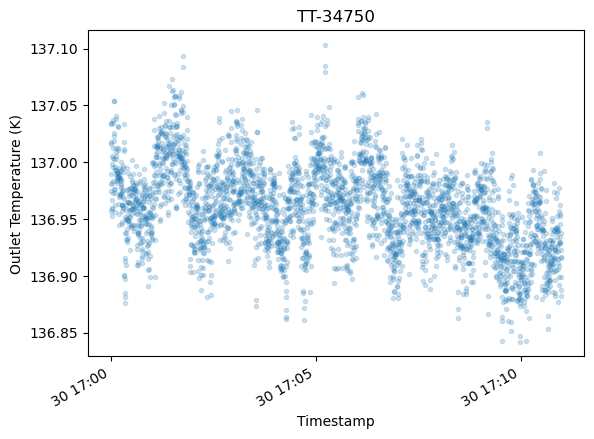

In [17]:
NAME = 'TT-34750'
FROM = '2022-12-30 17:00'
TO = '2022-12-30 17:10'

query = f"Name == '{NAME}'"
ylabel = f"{metadata.loc[NAME,'Description']} ({metadata.loc[NAME,'Unit']})"

value = data.query(query).loc[FROM:TO,'Value']
ax = value.plot(ylabel=ylabel, title=NAME, marker = '.', linestyle = '', alpha = 0.2)

### Resample
Changes in cryogenics systems are expected to be somewhat slow and to resample the dataset to equidistant timestamps we use Pandas.resample() method. (Note however that resampling and aggregation over time may be problematic in the context of causal discovery.)

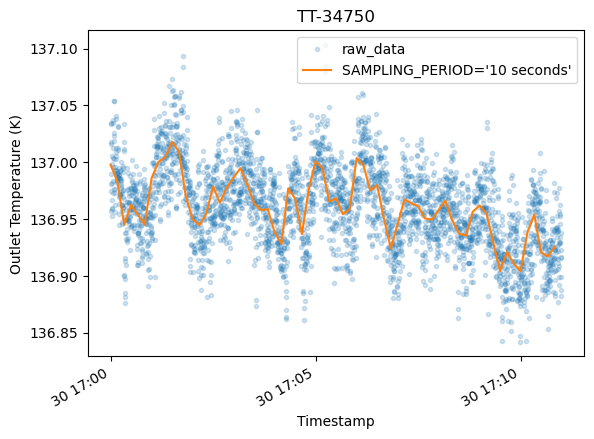

In [21]:
SAMPLING_PERIOD = '10 seconds'

period = pd.Timedelta(SAMPLING_PERIOD)
resampled_data = data.groupby('Name',observed=True)[['Value']].resample(period).mean().reset_index('Name').sort_index()

resampled_value = resampled_data.query(query).loc[FROM:TO,'Value']
legend = f'{SAMPLING_PERIOD=}'

ax = value.plot(ylabel=ylabel, title=NAME, marker = '.', linestyle = '', alpha = 0.2, label = 'raw_data', legend=True)
ax = resampled_value.plot(label = legend, legend=True)

### Pivot
To create a table with a common time index we use Pandas.pivot():

In [20]:
pivoted_data = resampled_data.pivot(columns = 'Name',values='Value').ffill()

columns = metadata['Subsystem_Index'].sort_values()
pivoted_data  = pivoted_data[list(columns.index)]

pivoted_data.columns = pd.MultiIndex.from_arrays([columns,columns.index])
pivoted_data

Subsystem_Index                   A1                               A2   
Name                        PT-31220  TT-31210A   TT-31480A  PT-31221   
Timestamp                                                               
2022-12-30 17:00:00+01:00  11.772483  73.497830  291.550018  6.625050  \
2022-12-30 17:00:10+01:00  11.776823  73.502004  291.550018  6.624805   
2022-12-30 17:00:20+01:00  11.772846  73.500004  291.550018  6.622903   
2022-12-30 17:00:30+01:00  11.781323  73.497372  291.550018  6.624043   
2022-12-30 17:00:40+01:00  11.774979  73.502945  291.550018  6.624824   
...                              ...        ...         ...       ...   
2022-12-30 17:59:10+01:00  11.858377  73.700001  291.497634  6.628482   
2022-12-30 17:59:20+01:00  11.862567  73.700001  291.500015  6.627858   
2022-12-30 17:59:30+01:00  11.858771  73.700001  291.500015  6.624208   
2022-12-30 17:59:40+01:00  11.856599  73.700001  291.500015  6.625457   
2022-12-30 17:59:50+01:00  11.853909  73.700001  291.500015  6.628247   

Subsystem_Index                                                     A3   
Name                       PT-31483   TT-31210B   TT-31480B   PT-31490   
Timestamp                                                                
2022-12-30 17:00:00+01:00  1.075105  235.650009  291.649994  11.737462  \
2022-12-30 17:00:10+01:00  1.078980  235.650009  291.649994  11.736741   
2022-12-30 17:00:20+01:00  1.080198  235.650009  291.649994  11.744400   
2022-12-30 17:00:30+01:00  1.080660  235.650009  291.649994  11.737366   
2022-12-30 17:00:40+01:00  1.080429  235.650009  291.649994  11.743902   
...                             ...         ...         ...        ...   
2022-12-30 17:59:10+01:00  1.006767  235.650009  291.649994  11.822266   
2022-12-30 17:59:20+01:00  1.010532  235.650009  291.649994  11.828653   
2022-12-30 17:59:30+01:00  1.010064  235.650009  291.649994  11.815676   
2022-12-30 17:59:40+01:00  1.005859  235.650009  291.649994  11.818710   
2022-12-30 17:59:50+01:00  1.009996  235.650009  291.649994  11.820069   

Subsystem_Index                                  ...         TS              
Name                        TT-31401   TT-31452  ...   TT-31640   TT-31650   
Timestamp                                        ...                         
2022-12-30 17:00:00+01:00  19.696622  19.446240  ...  39.582123  53.050722  \
2022-12-30 17:00:10+01:00  19.705793  19.449913  ...  39.583808  53.052670   
2022-12-30 17:00:20+01:00  19.691663  19.452603  ...  39.587564  53.049126   
2022-12-30 17:00:30+01:00  19.707455  19.452076  ...  39.584942  53.050476   
2022-12-30 17:00:40+01:00  19.695572  19.452489  ...  39.583106  53.053785   
...                              ...        ...  ...        ...        ...   
2022-12-30 17:59:10+01:00  19.737505  19.499784  ...  39.451790  52.984946   
2022-12-30 17:59:20+01:00  19.742568  19.495965  ...  39.455754  52.980547   
2022-12-30 17:59:30+01:00  19.708868  19.496751  ...  39.454516  52.981068   
2022-12-30 17:59:40+01:00  19.697174  19.494512  ...  39.452927  52.977336   
2022-12-30 17:59:50+01:00  19.723300  19.495262  ...  39.456081  52.976025   

Subsystem_Index                  TV                                           
Name                       EH-31890  EH-32890  EH-32891  GT-31890  GT-32891   
Timestamp                                                                     
2022-12-30 17:00:00+01:00  2.016176  2.893518  0.789867  0.173394  0.917290  \
2022-12-30 17:00:10+01:00  1.942952  2.862338  0.759549  0.176920  0.919000   
2022-12-30 17:00:20+01:00  1.957000  2.850116  0.790551  0.175850  0.917230   
2022-12-30 17:00:30+01:00  1.952303  2.860029  0.742594  0.174013  0.917870   
2022-12-30 17:00:40+01:00  1.972187  2.858516  0.765931  0.176992  0.913613   
...                             ...       ...       ...       ...       ...   
2022-12-30 17:59:10+01:00  1.964633  2.842656  0.768591  0.177892  0.915979   
2022-12-30 17:59:20+01:00  1.930172  2.873425  0.734407  

### Correlation Matrix
Finally, we can construct the correlation matrix. (Note that this ignores the temporal structure of the data)

In [25]:

correlation = pivoted_data.corr()
correlation

Subsystem_Index                  A1                            A2             
Name                       PT-31220 TT-31210A TT-31480A  PT-31221  PT-31483   
Subsystem_Index Name                                                          
A1              PT-31220   1.000000  0.880685 -0.788303  0.396559 -0.099931  \
                TT-31210A  0.880685  1.000000 -0.631766  0.347258  0.061470   
                TT-31480A -0.788303 -0.631766  1.000000 -0.291024  0.344556   
A2              PT-31221   0.396559  0.347258 -0.291024  1.000000 -0.031348   
                PT-31483  -0.099931  0.061470  0.344556 -0.031348  1.000000   
...                             ...       ...       ...       ...       ...   
TV              GT-31890  -0.018959 -0.041554 -0.016256  0.025824 -0.127149   
                GT-32891   0.095214  0.118564 -0.047163  0.027857  0.037215   
                GT-32892  -0.066837 -0.072218  0.014157  0.007903  0.022320   
                PDT-32890  0.026791  0.013346 -0.050614  0.014981 -0.063053   
                PT-32890  -0.003433 -0.005902  0.045095  0.010898  0.006830   

Subsystem_Index                                      A3                       
Name                      TT-31210B TT-31480B  PT-31490  TT-31401  TT-31452   
Subsystem_Index Name                                                          
A1              PT-31220        NaN       NaN  0.986875  0.111743  0.241525  \
                TT-31210A       NaN       NaN  0.873279  0.242633  0.450166   
                TT-31480A       NaN       NaN -0.781083  0.022157 -0.093915   
A2              PT-31221        NaN       NaN  0.400201  0.022337  0.043711   
                PT-31483        NaN       NaN -0.100709  0.091033  0.190820   
...                             ...       ...       ...       ...       ...   
TV              GT-31890        NaN       NaN -0.013378  0.015139 -0.069360   
                GT-32891        NaN       NaN  0.088643  0.136228  0.107836   
                GT-32892        NaN       NaN -0.077978 -0.025145  0.049649   
                PDT-32890       NaN       NaN  0.022389  0.062170  0.005601   
                PT-32890        NaN       NaN -0.002172 -0.002884 -0.013442   

Subsystem_Index            ...        TS                  TV             
Name                       ...  TT-31640  TT-31650  EH-31890  EH-32890   
Subsystem_Index Name       ...                                           
A1              PT-31220   ... -0.977209 -0.895662 -0.009134 -0.156218  \
                TT-31210A  ... -0.818903 -0.720857  0.002150 -0.148142   
                TT-31480A  ...  0.832073  0.869366  0.034210  0.091201   
A2              PT-31221   ... -0.407218 -0.351667 -0.032405 -0.056317   
                PT-31483   ...  0.202279  0.456273  0.075880  0.009855   
...                        ...       ...       ...       ...       ...   
TV              GT-31890   ... -0.000079 -0.050711  0.001835  0.088038   
                GT-32891   ... -0.077221 -0.048531  0.027718 -0.010883   
                GT-32892   ...  0.067021  0.051886  0.068785  0.105966   
                PDT-32890  ... -0.025393 -0.043685 -0.102230 -0.068237   
                PT-32890   ...  0.011931  0.028943  0.043566  0.013512   

Subsystem_Index                                                               
Name                       EH-32891  GT-31890  GT-32891  GT-32892 PDT-32890   
Subsystem_Index Name                                                          
A1              PT-31220  -0.068179 -0.018959  0.095214 -0.066837  0.026791  \
                TT-31210A -0.029524 -0.041554  0.118564 -0.072218  0.013346   
                TT-31480A  0.107697 -0.016256 -0.047163  0.014157 -0.050614   
A2              PT-31221  -0.082936  0.025824  0.027857  0.007903  0.014981   
                PT-31483   0.085935 -0.127149  0.037215  0.022320 -0.063053   
...                             ...       ...       ...       ...       ...   
TV              GT-31890  -0.052792  1